In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from vqvae import PROJECT_ROOT

sns.set_theme()
plt.rcParams["savefig.bbox"] = "tight"

log_dir = PROJECT_ROOT / "logs"
figure_dir = PROJECT_ROOT / "figures" / 'loss'

figure_dir.mkdir(parents=True, exist_ok=True)

## CIFAR-10

### Reconstruction Loss

In [49]:
dfs = {
    "Baseline / Train": pd.read_csv(
        log_dir
        / "cifar10"
        / "loss_csvs"
        / "reconstruction/run-cifar10_lightning_logs_cifar10_baseline-tag-loss_recon.csv"
    ),
    "Baseline / Validation": pd.read_csv(
        log_dir
        / "cifar10"
        / "loss_csvs"
        / "reconstruction/run-cifar10_lightning_logs_cifar10_baseline-tag-loss_recon_val.csv"
    ),
    "Without EMA / Train": pd.read_csv(
        log_dir
        / "cifar10"
        / "loss_csvs"
        / "reconstruction/run-cifar10_lightning_logs_cifar10_wo_ema-tag-loss_recon.csv"
    ),
    "Without EMA / Validation": pd.read_csv(
        log_dir
        / "cifar10"
        / "loss_csvs"
        / "reconstruction/run-cifar10_lightning_logs_cifar10_wo_ema-tag-loss_recon_val.csv"
    )
}
dfs = {k: v.drop("Wall time", axis=1) for k, v in dfs.items()}


In [50]:
df = pd.DataFrame({"Step": []})
for k, v in dfs.items():
    df = pd.merge(df, v, on="Step", how="outer", suffixes=("", f"_{k}"))

In [51]:
new_columns = {k: k.replace("Value_", "") for k in df.columns}
new_columns.update({"Value": "Baseline / Train"})
df = df.rename(columns=new_columns)
df = df.melt(id_vars="Step", var_name="Experiment / Split", value_name="Reconstruction Loss (MSE)")

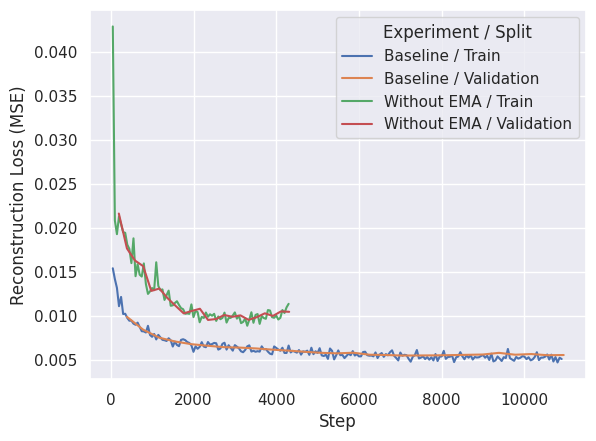

In [52]:
sns.lineplot(data=df, x="Step", y="Reconstruction Loss (MSE)", hue="Experiment / Split")
plt.savefig(figure_dir / "cifar10_reconstruction.pdf")

### Quantization Loss

In [35]:
dfs = {
    "Baseline / Train": pd.read_csv(
        log_dir
        / "cifar10"
        / "loss_csvs"
        / "quantization/run-cifar10_lightning_logs_cifar10_baseline-tag-loss_quantization.csv"
    ),
    "Baseline / Validation": pd.read_csv(
        log_dir
        / "cifar10"
        / "loss_csvs"
        / "quantization/run-cifar10_lightning_logs_cifar10_baseline-tag-loss_quantization_val.csv"
    ),
    "Without EMA / Train": pd.read_csv(
        log_dir
        / "cifar10"
        / "loss_csvs"
        / "quantization/run-cifar10_lightning_logs_cifar10_wo_ema-tag-loss_quantization.csv"
    ),
    "Without EMA / Validation": pd.read_csv(
        log_dir
        / "cifar10"
        / "loss_csvs"
        / "quantization/run-cifar10_lightning_logs_cifar10_wo_ema-tag-loss_quantization_val.csv"
    ),
}
dfs = {k: v.drop("Wall time", axis=1) for k, v in dfs.items()}

In [36]:
df = pd.DataFrame({"Step": []})
for k, v in dfs.items():
    df = pd.merge(df, v, on="Step", how="outer", suffixes=("", f"_{k}"))

In [37]:
new_columns = {k: k.replace("Value_", "") for k in df.columns}
new_columns.update({"Value": "Baseline / Train"})
df = df.rename(columns=new_columns)
df = df.melt(id_vars="Step", var_name="Experiment / Split", value_name="Quantization Loss (MSE)")

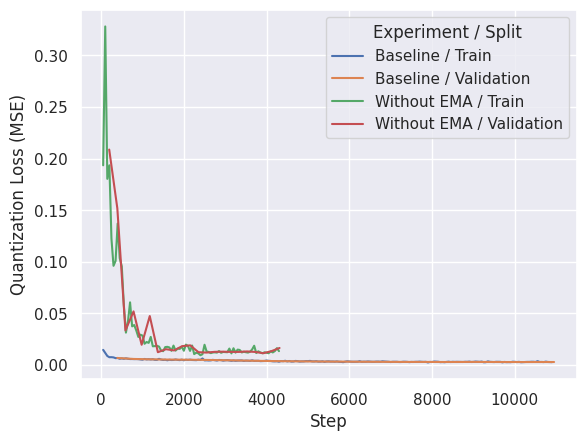

In [38]:
sns.lineplot(data=df, x="Step", y="Quantization Loss (MSE)", hue="Experiment / Split")
plt.savefig(figure_dir / "cifar10_quantization.pdf")

## CelebA

In [31]:
dfs = {
    "ImageNet / Train": pd.read_csv(
        log_dir
        / "celeba"
        / "loss_csvs"
        / "quantization/run-lightning_logs_celeba_baseline-tag-loss_quantization.csv"
    ),
    "ImageNet / Validation": pd.read_csv(
        log_dir
        / "celeba"
        / "loss_csvs"
        / "quantization/run-lightning_logs_celeba_baseline-tag-loss_quantization_val.csv"
    ),
    "Reduced Latent Dimension / Train": pd.read_csv(
        log_dir
        / "celeba"
        / "loss_csvs"
        / "quantization/run-lightning_logs_celeba_latent_256-tag-loss_quantization.csv"
    ),
    "Reduced Latent Dimension / Validation": pd.read_csv(
        log_dir
        / "celeba"
        / "loss_csvs"
        / "quantization/run-lightning_logs_celeba_latent_256-tag-loss_quantization_val.csv"
    ),
    "Reduced Latent Dimension Without EMA / Train": pd.read_csv(
        log_dir
        / "celeba"
        / "loss_csvs"
        / "quantization/run-lightning_logs_celeba_wo_ema-tag-loss_quantization.csv"
    ),
    "Reduced Latent Dimension Without EMA / Validation": pd.read_csv(
        log_dir
        / "celeba"
        / "loss_csvs"
        / "quantization/run-lightning_logs_celeba_wo_ema-tag-loss_quantization_val.csv"
    )
}
dfs = {k: v.drop("Wall time", axis=1) for k, v in dfs.items()}


In [32]:
df = pd.DataFrame({"Step": []})
for k, v in dfs.items():
    df = pd.merge(df, v, on="Step", how="outer", suffixes=("", f"_{k}"))
new_columns = {k: k.replace("Value_", "") for k in df.columns}
new_columns.update({"Value": "ImageNet / Train"})
df = df.rename(columns=new_columns)
df = df.melt(
    id_vars="Step", var_name="Experiment / Split", value_name="Quantization Loss (MSE)"
)
# df["Quantization Loss (MSE)"] = df["Quantization Loss (MSE)"].clip(upper=0.02)

In [33]:
df.max()

Step                                                                  221328
Experiment / Split         Reduced Latent Dimension Without EMA / Validation
Quantization Loss (MSE)                                             0.187398
dtype: object

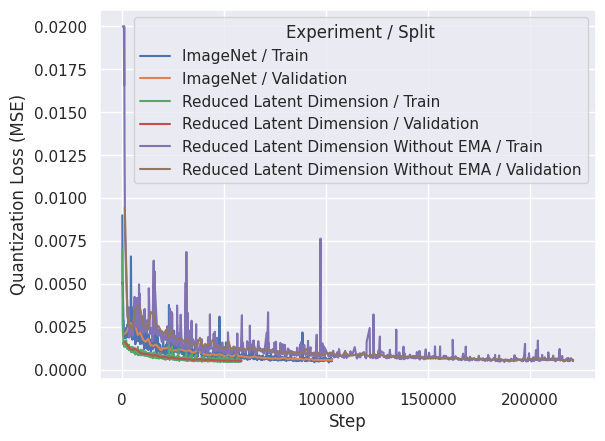

In [19]:
sns.lineplot(data=df, x="Step", y="Quantization Loss (MSE)", hue="Experiment / Split")
plt.savefig(figure_dir / "celeba_quantization.pdf")

In [27]:
dfs = {
    "ImageNet / Train": pd.read_csv(
        log_dir
        / "celeba"
        / "loss_csvs"
        / "reconstruction/run-lightning_logs_celeba_baseline-tag-loss_recon.csv"
    ),
    "ImageNet / Validation": pd.read_csv(
        log_dir
        / "celeba"
        / "loss_csvs"
        / "reconstruction/run-lightning_logs_celeba_baseline-tag-loss_recon_val.csv"
    ),
    "Reduced Latent Dimension / Train": pd.read_csv(
        log_dir
        / "celeba"
        / "loss_csvs"
        / "reconstruction/run-lightning_logs_celeba_latent_256-tag-loss_recon.csv"
    ),
    "Reduced Latent Dimension / Validation": pd.read_csv(
        log_dir
        / "celeba"
        / "loss_csvs"
        / "reconstruction/run-lightning_logs_celeba_latent_256-tag-loss_recon_val.csv"
    ),
    "Reduced Latent Dimension Without EMA / Train": pd.read_csv(
        log_dir
        / "celeba"
        / "loss_csvs"
        / "reconstruction/run-lightning_logs_celeba_wo_ema-tag-loss_recon.csv"
    ),
    "Reduced Latent Dimension Without EMA / Validation": pd.read_csv(
        log_dir
        / "celeba"
        / "loss_csvs"
        / "reconstruction/run-lightning_logs_celeba_wo_ema-tag-loss_recon_val.csv"
    )
}
dfs = {k: v.drop("Wall time", axis=1) for k, v in dfs.items()}


In [28]:
df = pd.DataFrame({"Step": []})
for k, v in dfs.items():
    df = pd.merge(df, v, on="Step", how="outer", suffixes=("", f"_{k}"))
new_columns = {k: k.replace("Value_", "") for k in df.columns}
new_columns.update({"Value": "ImageNet / Train"})
df = df.rename(columns=new_columns)
df = df.melt(
    id_vars="Step", var_name="Experiment / Split", value_name="Reconstruction Loss (MSE)"
)

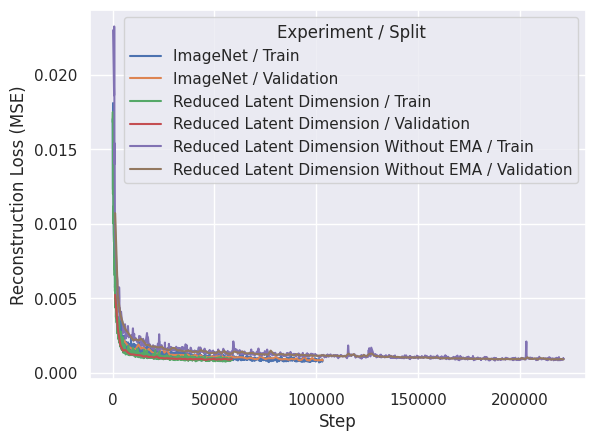

In [29]:
sns.lineplot(data=df, x="Step", y="Reconstruction Loss (MSE)", hue="Experiment / Split")
plt.savefig(figure_dir / "celeba_reconstruction_loss.pdf")